**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [3]:
print('Books: No. of records = %d, No. of features = %d'%(books.shape[0],books.shape[1]))

Books: No. of records = 271360, No. of features = 8


In [4]:
print('Users: No. of records = %d, No. of features = %d'%(users.shape[0],users.shape[1]))

Users: No. of records = 278858, No. of features = 3


In [5]:
print('Ratings: No. of records = %d, No. of features = %d'%(ratings.shape[0],ratings.shape[1]))

Ratings: No. of records = 1149780, No. of features = 3


## Exploring books dataset

In [6]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [7]:
books.drop(columns=['imageUrlS','imageUrlM','imageUrlL'],inplace=True)

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [9]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [10]:
books[(books['yearOfPublication'] == 'DK Publishing Inc')]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [11]:
books = books[(books['yearOfPublication'] != 'DK Publishing Inc')&((books['yearOfPublication'] != 'Gallimard'))]

### Change the datatype of yearOfPublication to 'int'

In [12]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int64')

In [13]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [14]:
books.dropna(inplace=True)

In [15]:
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

## Exploring Users dataset

In [16]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [17]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [18]:
users['Age'] = np.where((users['Age']<5) | (users['Age'] > 90),np.nan, users['Age'])

### Replace null values in column `Age` with mean

In [19]:
users['Age'].fillna(users['Age'].mean(), inplace= True)

### Change the datatype of `Age` to `int`

In [20]:
users['Age'] = users['Age'].astype('int64')

In [21]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [22]:
ratings.shape

(1149780, 3)

In [23]:
n_users = users.shape[0]
n_books = books.shape[0]

In [24]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [25]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [26]:
#Selecting only those ISBNs that are present in the books dataframe
ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [27]:
#Selecting only those userIDs that are present in the users dataframe
ratings = ratings[ratings['userID'].isin(users['userID'])]

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [28]:
#Subsetting the bookRating column
ratings = ratings[(ratings['bookRating']>0) & (ratings['bookRating']<=10)]
#Looking at the unique values in the bookRating column
print(sorted(ratings['bookRating'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Find out which rating has been given highest number of times

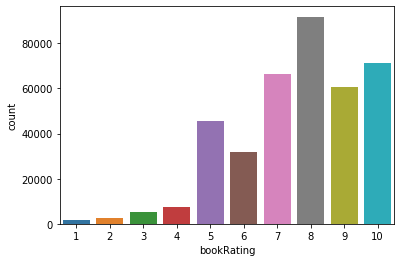

In [29]:
#Looking at the count of different ratings
sns.countplot(data = ratings, x = 'bookRating')

In [30]:
#Getting the mode using the mode function
from statistics import mode
print('Mode of bookRating =',mode(ratings['bookRating']))

Mode of bookRating = 8


Looks like on average, users give a rating of 8.

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [31]:
#Grouping by userID and taking the count of records
user_counts = ratings.groupby('userID').count().sort_values('bookRating', ascending = False)

#Only taking users having count greater than 100 and storing them in final_users
final_users = user_counts[user_counts['bookRating']>100]
final_users.reset_index(inplace=True)

#Subsetting for these users in the ratings dataframe and storing it as ratings_final
ratings_final = ratings[ratings['userID'].isin(final_users['userID'])]
ratings_final.shape

(102369, 3)

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [32]:
#Filling null values with zero
ratings_final.fillna(0, inplace=True)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [33]:
#Importing required libraries
from surprise import SVD
from surprise import Dataset
from surprise import Reader 
from datetime import datetime
from collections import defaultdict

In [34]:
#Creating the reader object to take a rating sale between 1 and 10
reader = Reader(rating_scale=(1, 10))
#Loading the data using the load_from_df method 
data = Dataset.load_from_df(ratings_final[['userID', 'ISBN', 'bookRating']], reader)

In [35]:
start = datetime.now()
#Creating the full training set
trainset = data.build_full_trainset()
#Selecting no. of singular values as 50
algo = SVD(n_factors = 50, random_state=42)
#Fitting the algorithm on the training set
algo.fit(trainset)
end = datetime.now()
print('Time taken to train and fit =',(end - start))

Time taken to train and fit = 0:00:03.096574


In [36]:
start = datetime.now()
#Testing on the testset
testset = trainset.build_anti_testset()
#Getting the prediction
predictions = algo.test(testset)
end = datetime.now()
print('Time taken to predict =',(end - start))

Time taken to predict = 0:04:17.791290


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [37]:
userID = 2110

In [38]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [39]:
predictions_df = pd.DataFrame(predictions)

In [40]:

predictions_df[predictions_df['uid'] == userID].sort_values(by = "est", ascending = False).head()

,uid,iid,r_ui,est,details
199560,2110,0877017883,7.825914,9.835203,{'was_impossible': False}
210669,2110,0679723161,7.825914,9.729740,{'was_impossible': False}
204214,2110,0671041789,7.825914,9.679423,{'was_impossible': False}
204851,2110,0743454529,7.825914,9.630161,{'was_impossible': False}
198121,2110,0439139597,7.825914,9.588030,{'was_impossible': False}


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [41]:
user_data = ratings[ratings['userID'] == userID]

In [42]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [43]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [44]:
#Left joining user_data with books on ISBN
book_data = user_data.merge(books, how = 'left', on = 'ISBN')
book_data.drop(columns=['userID','bookRating'], inplace=True)

In [45]:
book_data.shape

(103, 5)

In [46]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0060987529,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
2,0140022651,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,0142302163,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,0151008116,Life of Pi,Yann Martel,2002,Harcourt


In [47]:
#Getting the user_full_info datframe
user_full_info = user_data.merge(book_data, how = 'left', on = 'ISBN')

In [48]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [49]:
#Defining a function to get top 10 recommendations
def get_top_10(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [50]:
#Getting only the predictions for userID 2110
predictions_2110 = list(predictions_df[predictions_df['uid'] == userID].values)

In [51]:
#Getting the top 10 recommendations for userID 2110
top_10 = get_top_10(predictions_2110, n=10)
#Converting the defaultdict to a dataframe
ISBN = []
rating = []
for x,y in top_10[2110]:
    ISBN.append(x)
    rating.append(y)
ISBN = pd.DataFrame(ISBN)
rating = pd.DataFrame(rating)
reco_2110 = pd.concat([ISBN,rating], axis = 1)
reco_2110.columns = ['ISBN','Predicted_Rating']

#Getting the details of the recommended books
reco_2110 = reco_2110.merge(books, how = 'left', on = 'ISBN')
reco_2110['UserID'] = 2110
print('Top 10 books for userID 2110:')
reco_2110.loc[:,['UserID','ISBN','bookTitle','bookAuthor','Predicted_Rating']]

Top 10 books for userID 2110:


,UserID,ISBN,bookTitle,bookAuthor,Predicted_Rating
0,2110,0877017883,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,9.835203
1,2110,0679723161,Lolita (Vintage International),VLADIMIR NABOKOV,9.729740
2,2110,0671041789,The Green Mile,Stephen King,9.679423
3,2110,0743454529,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,9.630161
4,2110,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,9.588030
5,2110,1573229725,Fingersmith,Sarah Waters,9.583236
6,2110,0446310786,To Kill a Mockingbird,Harper Lee,9.577178
7,2110,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.466592
8,2110,0064400557,Charlotte's Web (Trophy Newbery),E. B. White,9.427335
9,2110,044021145X,The Firm,John Grisham,9.419823


----------------